In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors # for custom color maps

# import data for specific basal ganglia ROIs
df = pd.read_excel(r"C:\Users\32ava\Downloads\Group Project\Group Project\Datasets\ADHD_ICM_random200.xlsx")
ROI_df = df[["'Subject_ID'", "'Gender'", "'Age'", "'Diagnosis'", "'Caud_L'", "'Caud_R'", "'Caudate_tail_L'", "'Caudate_tail_R'", "'GP_L'", "'GP_R'", "'NucAccumbens_L'", "'NucAccumbens_R'", "'Put_L'", "'Put_R'"]]
ROI_df.columns = ROI_df.columns.str.strip("'")
ROI_df.head()

,Subject_ID,Gender,Age,Diagnosis,Caud_L,Caud_R,Caudate_tail_L,Caudate_tail_R,GP_L,GP_R,NucAccumbens_L,NucAccumbens_R,Put_L,Put_R
0,'Subject_1','F',5.873973,'NORMAL',6132,6097,20,183,269,111,2703,2700,3485,4398
1,'Subject_2','M',10.893151,'ADHD',7615,7178,285,284,1425,1300,1263,1699,5703,6814
2,'Subject_3','M',4.106849,'NORMAL',9410,8465,148,17,270,190,1694,900,5812,5997
3,'Subject_4','M',6.772603,'ADHD',4836,4672,287,281,1330,1311,883,1014,4798,4897
4,'Subject_5','M',5.816438,'ADHD',4623,4650,232,250,1485,1373,969,910,4907,5080


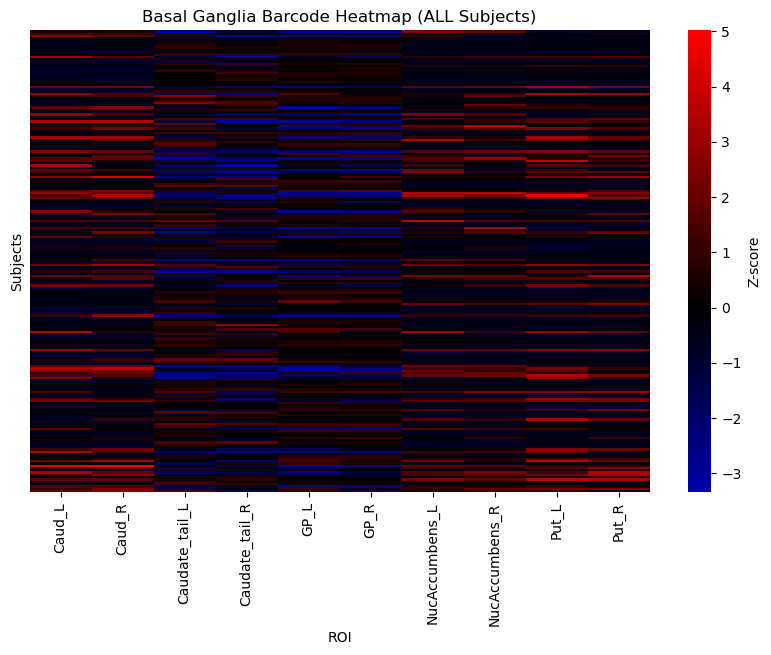

In [2]:
# control patients 
control_df = ROI_df[ROI_df["Diagnosis"] == "'NORMAL'"]
control_df = control_df.drop(columns=["Subject_ID", "Gender", "Age", "Diagnosis"])

# calculate mean and std for each ROI in control group
control_means = control_df.mean(numeric_only=True)
control_stds = control_df.std(numeric_only=True)
control_means, control_stds

# compute z-scores for all subjects based on control group statistics
z_scores = (ROI_df.drop(columns=["Subject_ID", "Gender", "Age", "Diagnosis"]).astype(float) - control_means) / control_stds
z_scores.insert(0, "Diagnosis", ROI_df["Diagnosis"]) # nothing is reordered so we can add back subject_id and diagnosis
z_scores.insert(0, "Subject_ID", ROI_df["Subject_ID"])

# save to CSV
z_scores.to_csv("ROI_z_scores.csv", index=False)

# generate barcodes
barcodes = z_scores.drop(columns=["Subject_ID", "Diagnosis"]).to_numpy()

# custom color map: Black = 0, Red = Positive, Blue = Negative
# creates a gradient between the colors
colors = ["blue", "black", "red"]
cmap = mcolors.LinearSegmentedColormap.from_list("blue_black_red", colors)

# plot barcodes for ALL subjects
plt.figure(figsize=(10, 6))
sns.heatmap(barcodes, cmap=cmap, center=0, cbar_kws={"label": "Z-score"}, xticklabels=z_scores.columns.drop(["Subject_ID", "Diagnosis"]),
        yticklabels=[])
plt.title("Basal Ganglia Barcode Heatmap (ALL Subjects)")
plt.xlabel("ROI")
plt.ylabel("Subjects")
plt.show()

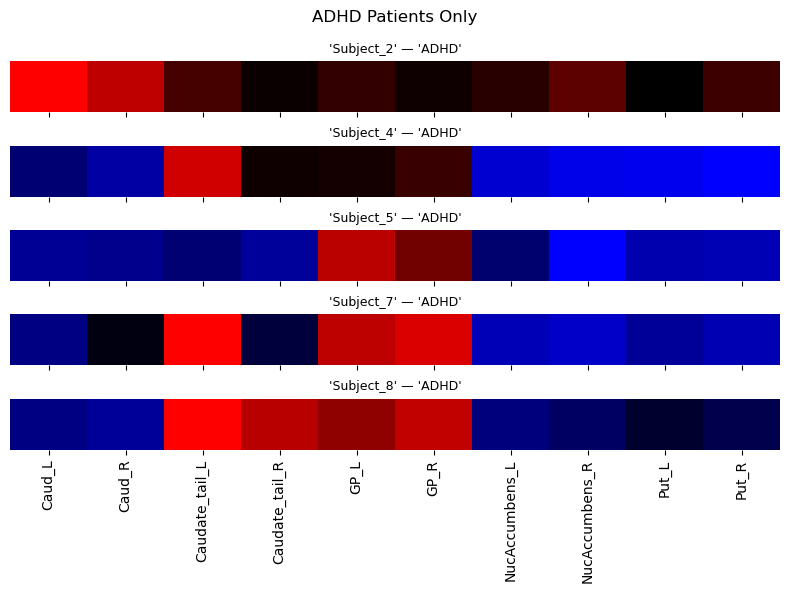

In [14]:
# plot barcodes for select ADHD subjects 
adhd_patients = z_scores[z_scores["Diagnosis"] == "'ADHD'"].head(5)

fig, axes = plt.subplots(5, 1, figsize=(8, 6), sharex=True)

for i, (_, row) in enumerate(adhd_patients.iterrows()):
    vals = row.drop(labels=["Subject_ID", "Diagnosis"]).astype(float).to_numpy().reshape(1, -1)
    sns.heatmap(
        vals,
        cmap=cmap,
        center=0,
        cbar=False,
        xticklabels=(z_scores.columns.drop(["Subject_ID", "Diagnosis"]) if i == 4 else []), # only want 5 patients
        yticklabels=[],
        ax=axes[i]
    )
    axes[i].set_title(f"{row['Subject_ID']} — {row['Diagnosis']}", fontsize=9)

fig.suptitle("ADHD Patients Only")
plt.tight_layout()
plt.show()


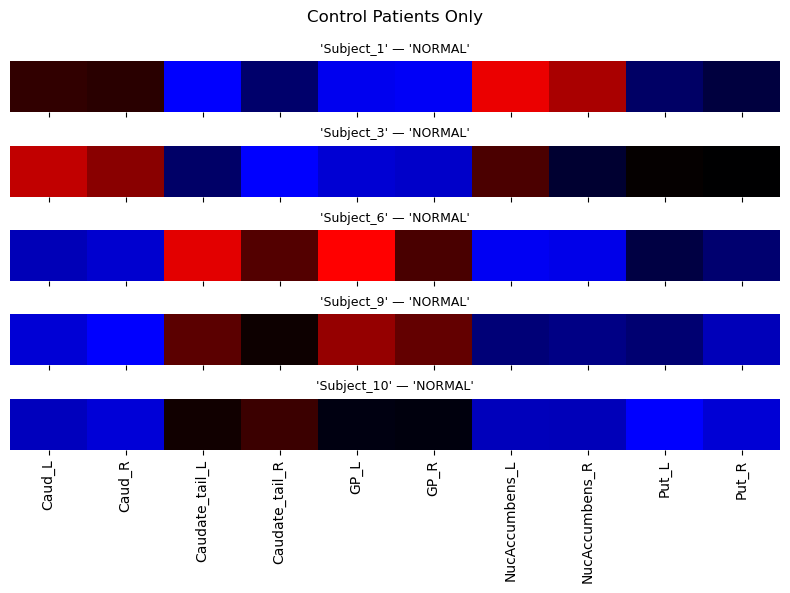

In [13]:
# plot barcodes for select CONTROL subjects 
control_patients = z_scores[z_scores["Diagnosis"] == "'NORMAL'"].head(5)

fig, axes = plt.subplots(5, 1, figsize=(8, 6), sharex=True)

for i, (_, row) in enumerate(control_patients.iterrows()):
    vals = row.drop(labels=["Subject_ID", "Diagnosis"]).astype(float).to_numpy().reshape(1, -1)
    sns.heatmap(
        vals,
        cmap=cmap,
        center=0,
        cbar=False,
        xticklabels=(z_scores.columns.drop(["Subject_ID", "Diagnosis"]) if i == 4 else []),
        yticklabels=[],
        ax=axes[i]
    )
    axes[i].set_title(f"{row['Subject_ID']} — {row['Diagnosis']}", fontsize=9)

fig.suptitle("Control Patients Only")
plt.tight_layout()
plt.show()
